In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the Excel file
df = pd.read_excel("Sales_2018.xlsx", engine='openpyxl')
print(df)

    Order Date Product Name   Sales  Profit         Category Region
0   2024-08-20    Product G  883.80   96.86  Office Supplies  South
1   2024-09-01    Product A  358.44  144.77        Furniture  South
2   2025-03-28    Product P  781.31  223.92  Office Supplies   West
3   2025-04-04    Product E  391.89  -52.25  Office Supplies  South
4   2025-01-03    Product N  856.19  181.36       Technology   East
..         ...          ...     ...     ...              ...    ...
195 2025-01-28    Product F  346.88  200.42        Furniture   East
196 2024-11-02    Product C  124.83   -3.11       Technology   East
197 2025-04-15    Product J  448.22  117.52       Technology   East
198 2025-05-24    Product K  486.17  108.82  Office Supplies  North
199 2024-07-22    Product M  971.42  -96.07  Office Supplies  South

[200 rows x 6 columns]


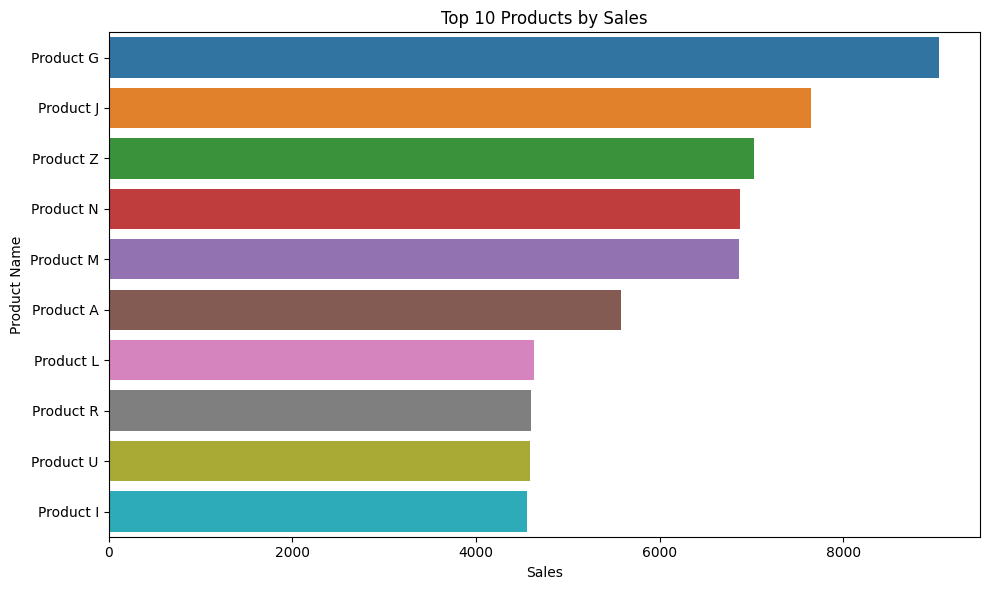

In [8]:
# Objective 1: Top 10 Products by Sales (Bar Plot)
top_10 = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, hue=top_10.index, legend=False)
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

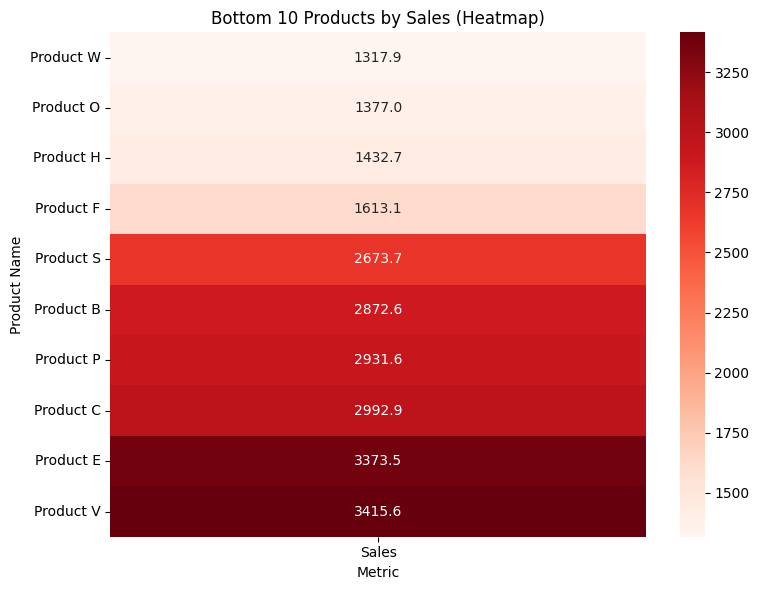

In [9]:
# Objective 2: Bottom 10 Products by Sales (Heatmap) 
bottom_10 = df.groupby("Product Name")["Sales"].sum().sort_values().head(10)
heatmap_data = pd.DataFrame({'Sales': bottom_10.values}, index=bottom_10.index)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".1f")
plt.title("Bottom 10 Products by Sales (Heatmap)")
plt.xlabel("Metric")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

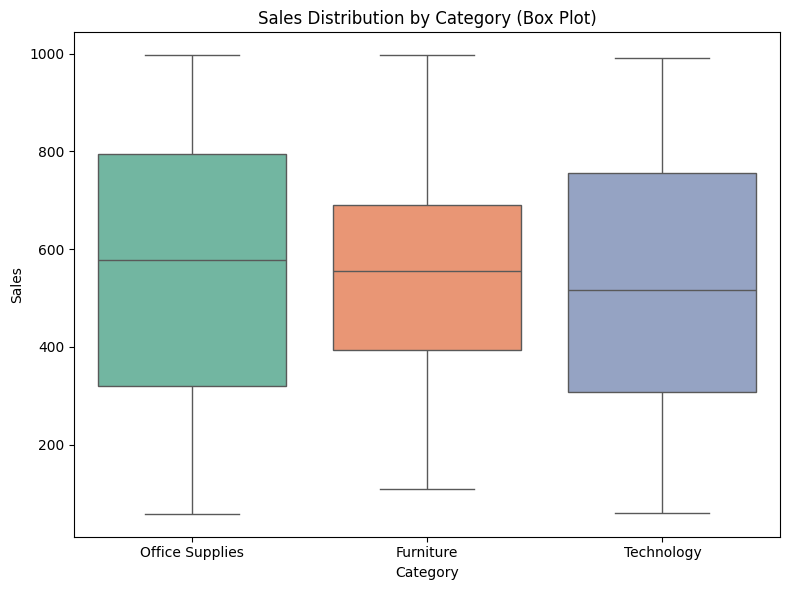

In [10]:
# Objective 3: Category-wise Sales (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Sales', data=df, hue='Category', palette='Set2', legend=False)
plt.title("Sales Distribution by Category (Box Plot)")
plt.tight_layout()
plt.show()

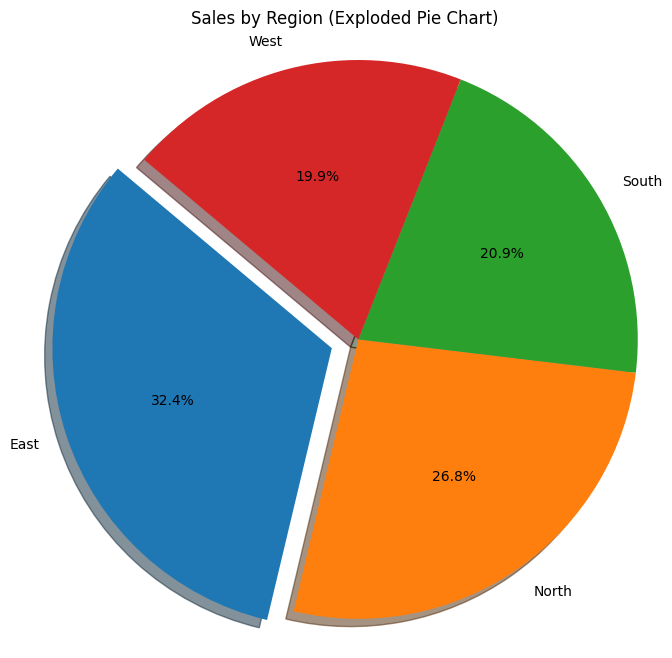

In [11]:
# Objective 4: Sales by Region (Exploded Pie Chart) 
region_sales = df.groupby("Region")["Sales"].sum()
explode = [0.1 if i == region_sales.idxmax() else 0 for i in region_sales.index]
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Sales by Region (Exploded Pie Chart)")
plt.axis('equal')
plt.show()


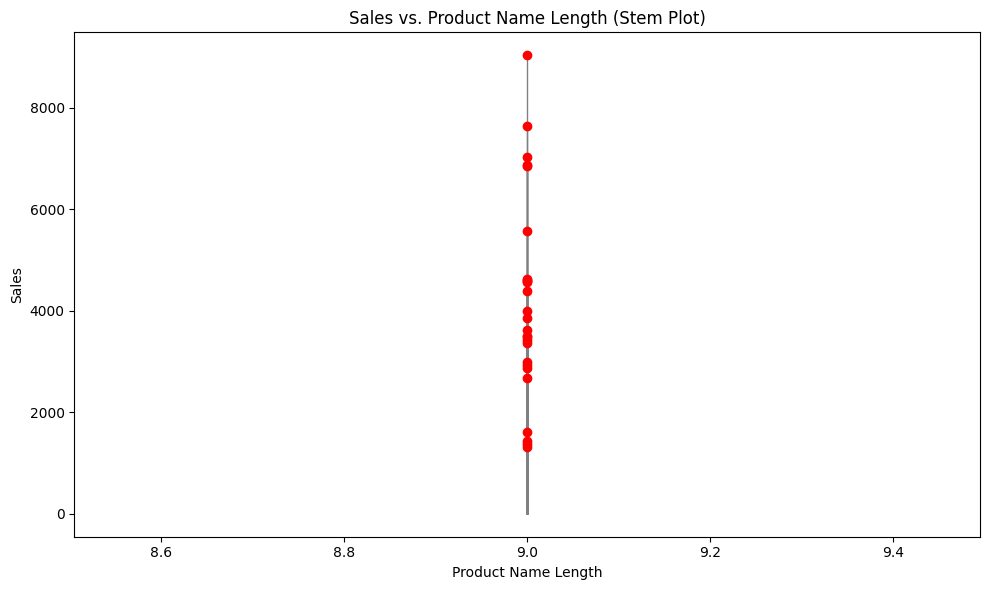

In [12]:
# Objective 5: Stem Plot of Product Name Length vs. Sales
name_sales = df.groupby("Product Name")["Sales"].sum().reset_index()
name_sales['Name_Length'] = name_sales['Product Name'].apply(len)
name_sales = name_sales.sort_values(by='Name_Length')
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(name_sales['Name_Length'], name_sales['Sales'])
plt.setp(stemlines, 'color', 'grey', 'linewidth', 1)
plt.setp(markerline, 'color', 'red', 'marker', 'o')
plt.title("Sales vs. Product Name Length (Stem Plot)")
plt.xlabel("Product Name Length")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

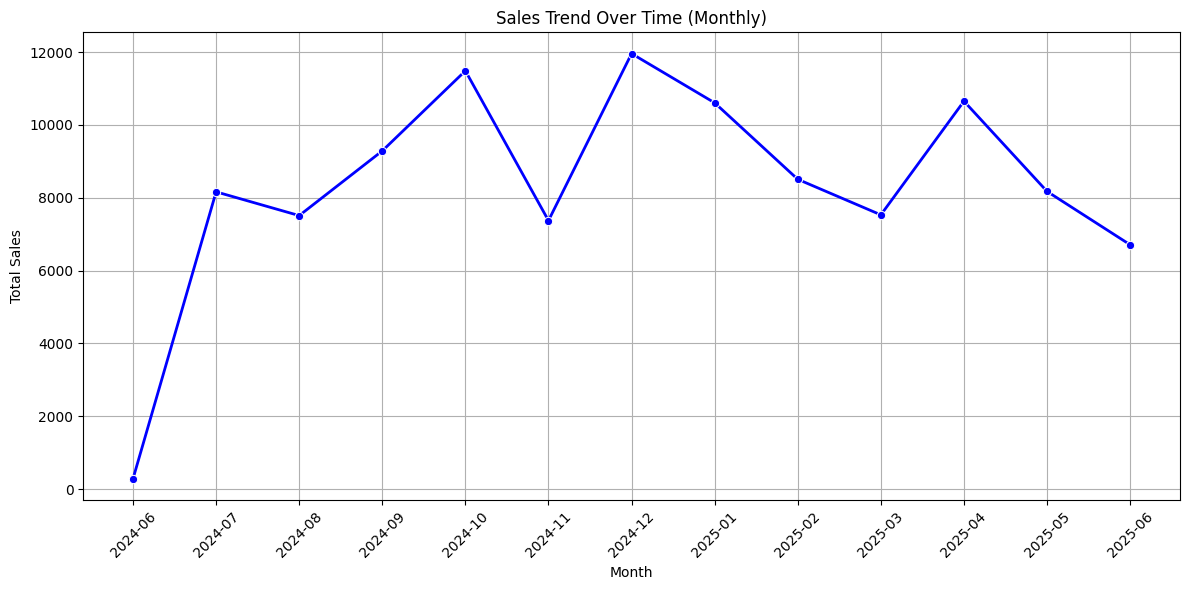

In [13]:
# Objective 6: Monthly Sales Trend (Line Plot)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o', linewidth=2, color='blue')
plt.xticks(rotation=45)
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

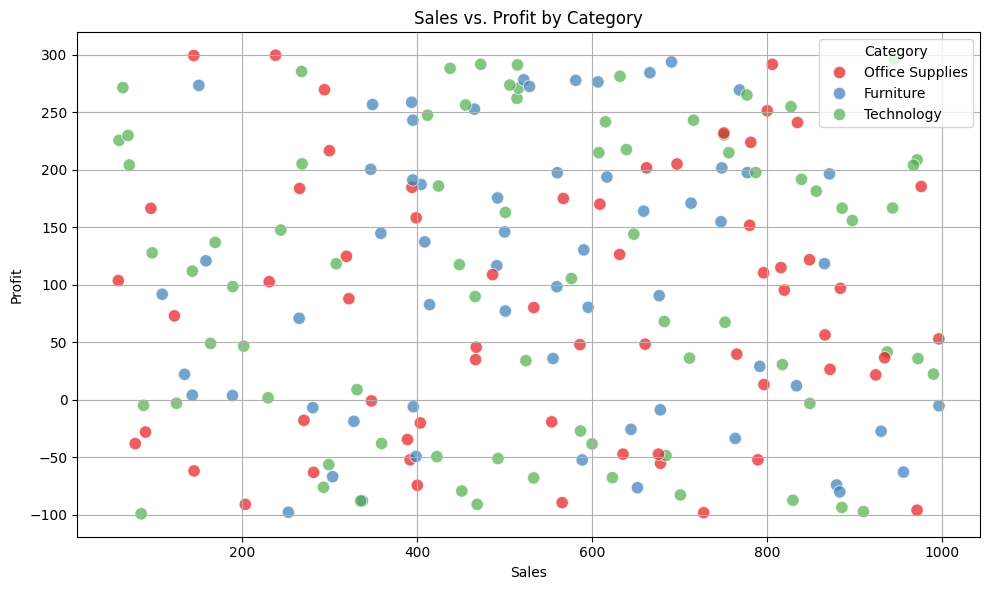

In [14]:
# Objective 7: Scatter Plot - Sales vs. Profit by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='Set1', alpha=0.7, s=80)
plt.title('Sales vs. Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()